In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
#Sometimes header is blank and content is  wrriten from second row so  to remove this read with header =1 

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data cleaning

In [5]:
## Check for missing values
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [6]:
#we can also check like this 
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The data set is converted into two sets based on region from 122 index, can make a new column based on the region <br>

1: Bejaia Region dataset <br>
2: Sidi-Bel Abbes Region dataset<br>
Add new colum with region<br>


In [7]:
df.loc[:122,"Region"] = 0
df.loc[122:,"Region"] = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [8]:
df[['Region']] = df[['Region']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [9]:
#Removing missing values
df = df.dropna().reset_index(drop=True)

In [10]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [11]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [12]:
##Removing the row 122
df = df.drop(122).reset_index(drop=True)

In [13]:
df.columns
##See some columns have spaces in their name, so we need to remove them

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [14]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

#### Changes the required columns as integer data type


In [15]:
df[['month','day','year','Temperature','RH','Ws']] = df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


#### Change other columns to float 

In [17]:
##Check which are objects
objects = [features for features in df.columns if df[features].dtype == 'O']
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [18]:
for i in objects:
    if i!='Classes':
        df[i] = df[i].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [19]:
##Lets convert this proper data into new csv file
df.to_csv('Cleaned.csv',index=False)

## EDA - Exploratory Data Analysis

In [20]:
dataset = pd.read_csv('Cleaned.csv')
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [21]:
dataset.drop(['day','month','year'],axis=1,inplace=True)

In [22]:
dataset.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [23]:
dataset['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [24]:
##Encoding of categories in classes
dataset['Classes']=np.where(dataset['Classes'].str.contains('not fire'),0,1)
## nd if there are more than two categories then we can use label encoding or one hot encoding or map it
##dataset['Classes'] = dataset['Classes'].map({'not fire': 0, 'small fire': 1, 'large fire': 2})
dataset.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [25]:
dataset['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [26]:
import seaborn as sns

In [27]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

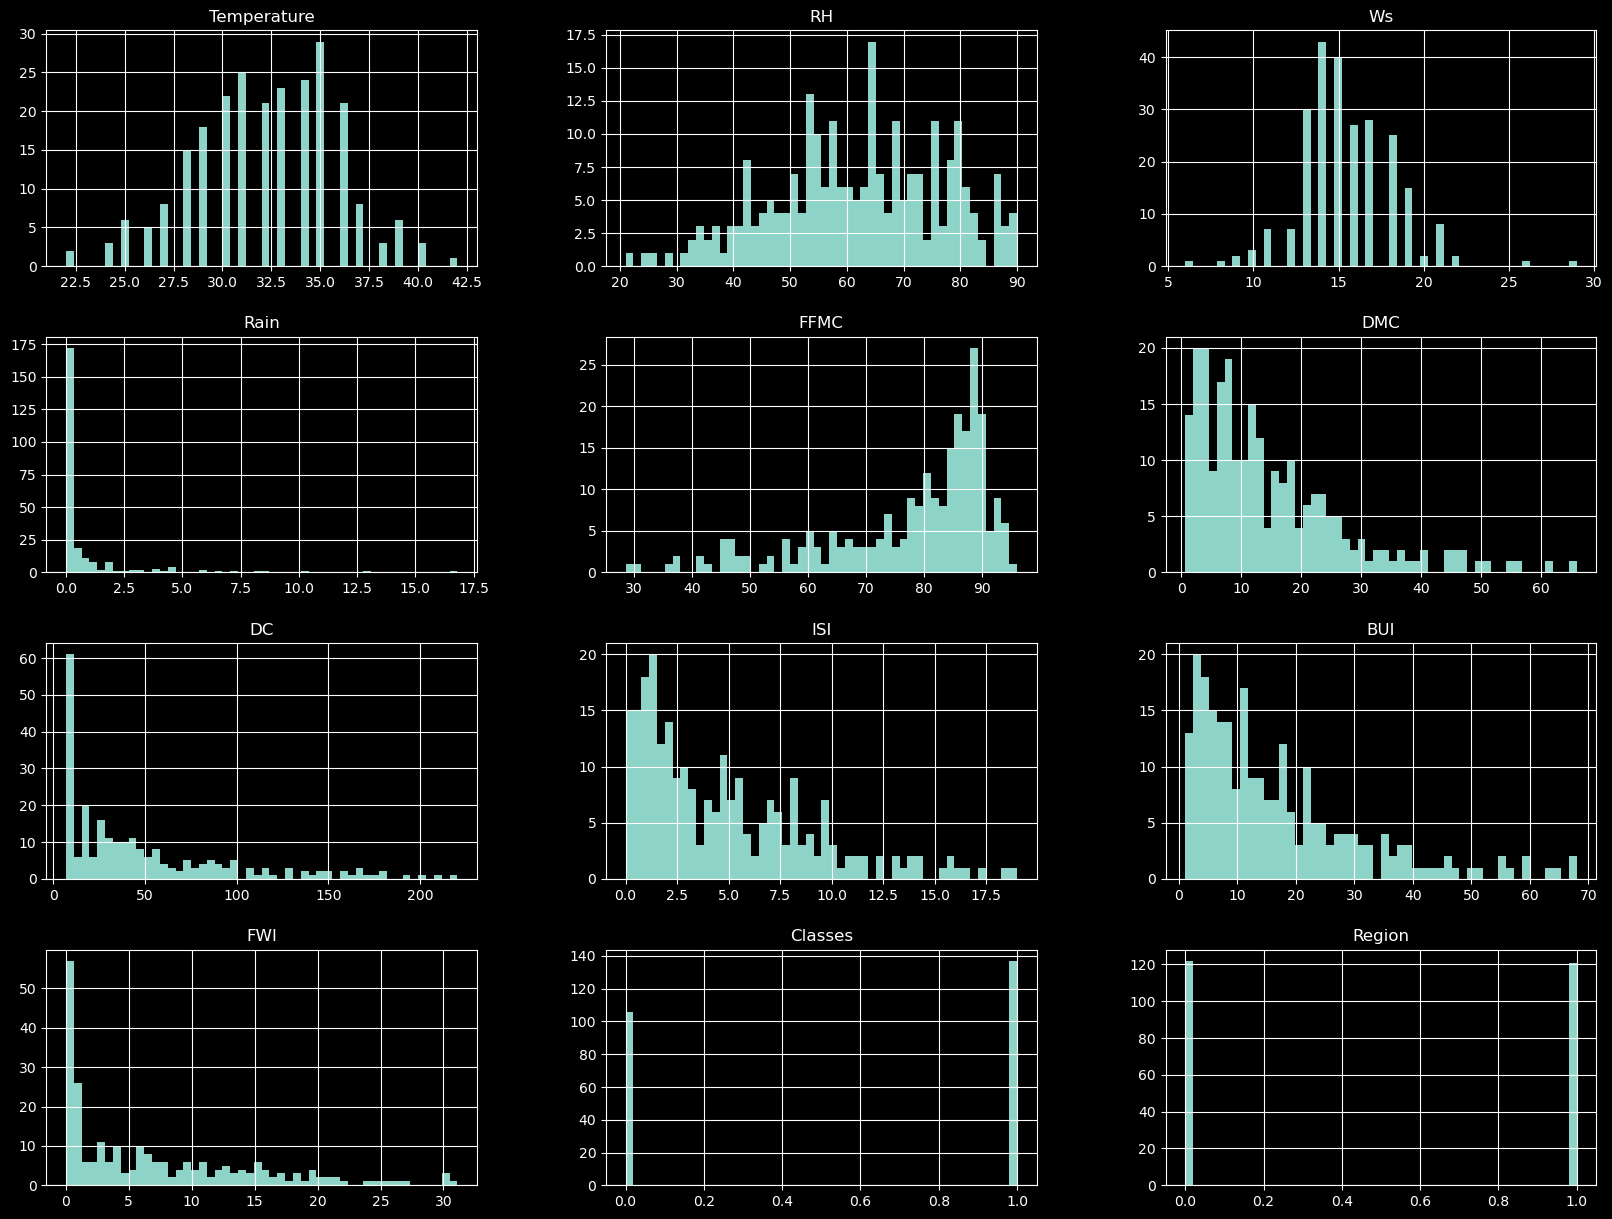

In [28]:
## Plot density plot for all the features
plt.style.use('dark_background')
dataset.hist(bins=50, figsize=(20,15))
plt.show()


In [29]:
## Percentage for pie chart
percentage = dataset['Classes'].value_counts(normalize=True)*100

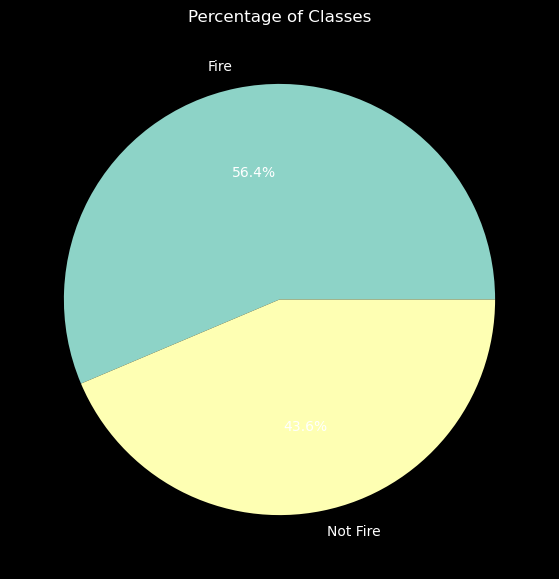

In [30]:
##Piechart
classlabels = ['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('Percentage of Classes')
plt.show()


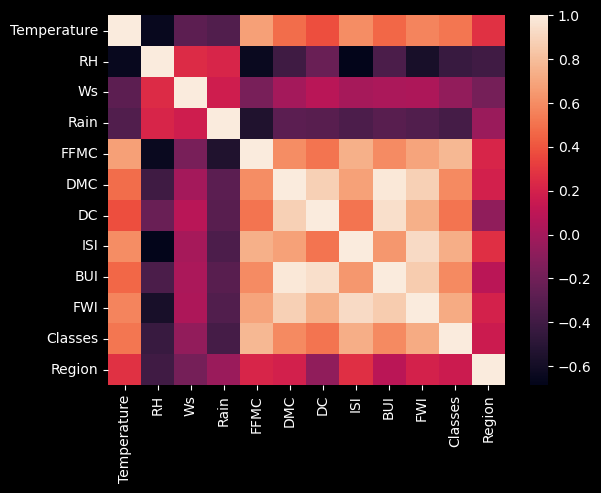

In [31]:
## Correlation 
sns.heatmap(dataset.corr())
plt.show()

In [32]:
dataset.corr()*100

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,100.000000,-65.140034,-28.450989,-32.649192,67.656815,48.568692,37.628353,60.387056,45.978947,56.666988,51.601549,26.955546
RH,-65.140034,100.000000,24.404838,22.235608,-64.487346,-40.851919,-22.694112,-68.666704,-35.384055,-58.095675,-43.216074,-40.268162
Ws,-28.450989,24.404838,100.000000,17.150618,-16.654827,-0.072097,7.913451,0.853169,3.143841,3.236777,-6.996363,-18.115952
Rain,-32.649192,22.235608,17.150618,100.000000,-54.390619,-28.877293,-29.802308,-34.748393,-29.985152,-32.442156,-37.909717,-4.001263
FFMC,67.656815,-64.487346,-16.654827,-54.390619,100.000000,60.360764,50.739666,74.000683,59.201101,69.113197,76.949230,22.224072
DMC,48.568692,-40.851919,-0.072097,-28.877293,60.360764,100.000000,87.592466,68.045433,98.224849,87.586416,58.565777,19.208879
DC,37.628353,-22.694112,7.913451,-29.802308,50.739666,87.592466,100.000000,50.864325,94.198846,73.952056,51.112333,-7.873397
ISI,60.387056,-68.666704,0.853169,-34.748393,74.000683,68.045433,50.864325,100.000000,64.409260,92.289493,73.519739,26.319709
BUI,45.978947,-35.384055,3.143841,-29.985152,59.201101,98.224849,94.198846,64.409260,100.000000,85.797310,58.663949,8.940833
FWI,56.666988,-58.095675,3.236777,-32.442156,69.113197,87.586416,73.952056,92.289493,85.797310,100.000000,71.921615,19.710233


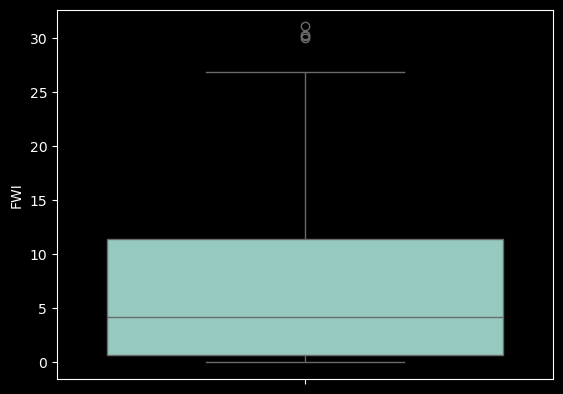

In [33]:
sns.boxplot(dataset['FWI'])
plt.show()

### Model Training

In [34]:
## Independent Features 
X= dataset.drop('FWI',axis=1)
## Dependent Features
Y = dataset['FWI']

In [35]:
## Splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

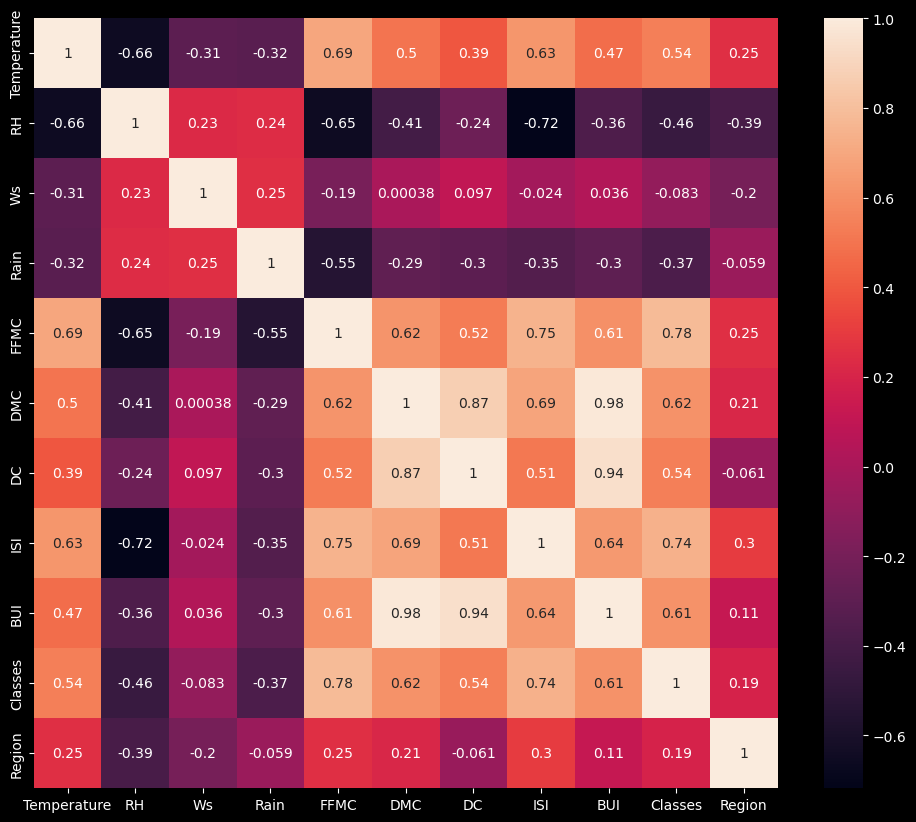

In [36]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [37]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [38]:
correlation(X_train,0.85)

{'BUI', 'DC'}

In [39]:
## Drop this features because they are highly correlated
X_train.drop(['DMC','DC'],axis=1,inplace=True)
X_test.drop(['DMC','DC'],axis=1,inplace=True)

#### Feature scaling or standardization

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_sc,Y_train)
Y_pred = linreg.predict(X_test_sc)
mae = mean_absolute_error(Y_test,Y_pred)
score = r2_score(Y_test,Y_pred)
print('Mean Absolute Error:',mae)
print('R2 Score:',score)

plt.scatter(Y_test,Y_pred)


Mean Absolute Error: 0.47398935407627435
R2 Score: 0.9885461787936622


### Lasso Regression

In [42]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_sc,Y_train)
Y_pred = lasso.predict(X_test_sc)
mae = mean_absolute_error(Y_test,Y_pred)
score = r2_score(Y_test,Y_pred)
print('Mean Absolute Error:',mae)
print('R2 Score:',score)

plt.scatter(Y_test,Y_pred)


Mean Absolute Error: 1.0405718849125527
R2 Score: 0.9558984658448342


In [43]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_sc,Y_train)


LassoCV(cv=5)

In [44]:
lassocv.predict(X_test_sc)

array([ 8.27995399,  7.27002227,  0.06846011,  5.7328719 ,  6.57829236,
        1.60402397,  2.64088026,  7.12809629,  2.13331279,  3.36318186,
        0.41302527,  7.23827168,  9.50329286, 16.07400746, 19.09601226,
        1.68009199,  1.50868032, -0.81546898,  6.71603232,  3.16057432,
        1.90568891,  0.24817233,  6.27928257, -0.04607729, 20.86434646,
        4.79245553,  5.75503345,  9.97569953, -0.83311925,  9.91619384,
        6.40747069, -0.07237658, 10.24076624, 15.07187421,  1.58232602,
        1.13578244,  1.8802761 ,  5.96265217, -0.45264794, -0.34361482,
        6.96289604,  1.73780165,  8.11480158, -0.99568844, 15.05122256,
        7.78689644,  7.7994466 ,  0.84921072, 12.46263477,  0.87425262,
       27.7834985 ,  5.35563367, 17.08880208, 19.93126337, 14.58052236,
       16.4931686 ,  1.06558413,  8.79798401,  3.91461898, 14.40980202,
        5.24165688])

In [45]:
print(lassocv.alpha_)
print(lassocv.alphas_)
print(lassocv.mse_path_)

0.06582808719529477
[7.05853002 6.58280872 6.13914944 5.72539132 5.33951911 4.97965339
 4.64404142 4.33104857 4.03915039 3.76692517 3.51304702 3.27627941
 3.05546914 2.84954075 2.65749124 2.47838523 2.31135036 2.15557308
 2.01029467 1.87480753 1.74845178 1.63061198 1.52071419 1.41822315
 1.32263965 1.23349817 1.15036452 1.0728338  1.00052839 0.93309613
 0.87020857 0.81155943 0.75686304 0.705853   0.65828087 0.61391494
 0.57253913 0.53395191 0.49796534 0.46440414 0.43310486 0.40391504
 0.37669252 0.3513047  0.32762794 0.30554691 0.28495408 0.26574912
 0.24783852 0.23113504 0.21555731 0.20102947 0.18748075 0.17484518
 0.1630612  0.15207142 0.14182231 0.13226397 0.12334982 0.11503645
 0.10728338 0.10005284 0.09330961 0.08702086 0.08115594 0.0756863
 0.0705853  0.06582809 0.06139149 0.05725391 0.05339519 0.04979653
 0.04644041 0.04331049 0.0403915  0.03766925 0.03513047 0.03276279
 0.03055469 0.02849541 0.02657491 0.02478385 0.0231135  0.02155573
 0.02010295 0.01874808 0.01748452 0.0163061

In [46]:
Y_pred=lassocv.predict(X_test_sc)
plt.scatter(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5130674807420571
R2 Score 0.9868198701992462


### Ridge Regression

In [47]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_sc,Y_train)
Y_pred = ridge.predict(X_test_sc)
mae = mean_absolute_error(Y_test,Y_pred)
score = r2_score(Y_test,Y_pred)
print('Mean Absolute Error:',mae)
print('R2 Score:',score)

plt.scatter(Y_test,Y_pred)


Mean Absolute Error: 0.48316481382990034
R2 Score: 0.9881863986620124


In [48]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_sc,Y_train)
Y_pred=ridgecv.predict(X_test_sc)
plt.scatter(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.48316481382990034
R2 Score 0.9881863986620124


In [49]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

### Elasticnet

In [50]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(X_train_sc,Y_train)
Y_pred = elastic.predict(X_test_sc)
mae = mean_absolute_error(Y_test,Y_pred)
score = r2_score(Y_test,Y_pred)
print('Mean Absolute Error:',mae)
print('R2 Score:',score)

plt.scatter(Y_test,Y_pred)

Mean Absolute Error: 1.8346234891165254
R2 Score: 0.8778093743119115


In [51]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_sc,Y_train)
Y_pred=elasticcv.predict(X_test_sc)
plt.scatter(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5647078146997297
R2 Score 0.9856422182597018


In [52]:

elasticcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

### Cross Validation

In [53]:
ridge

Ridge()

In [54]:
scaler

StandardScaler()

In [55]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

#### Hyperparameter Tuning